# Comparative Phase Plane for Partial Enforcement

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
from matplotlib.lines import Line2D
from scipy.special import lambertw
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.colors
import pickle
import ipynb.fs.defs.Functions_Equilibria_Along_Parameters as sliceFuncs
import ipynb.fs.defs.Functions_Equations_Equilibrium_Simulation as baseFuncs
import ipynb.fs.defs.Functions_Optimizer as optFuncs

### Evaluate Planes (Or Instead Read from Data Below)

In [ ]:
para = baseFuncs.paraReset()
param_mesh = 41
init_mesh = 20
large_b = 1
small_b = 0.1
param_x_label = "gamma_c"
param_y_label = "gamma_p"
eps = 1e-4
bnds = ((0+eps, 1-eps), (1-eps, 0+eps))

# Panel two
para = baseFuncs.paraReset()
para['b'] = small_b
planeData1 = sliceFuncs.evaluatePlane(para, param_x_label, param_y_label, bnds, param_x_mesh = param_mesh, 
                                      param_y_mesh = param_mesh, init_mesh = init_mesh)

# Panel four
para = baseFuncs.paraReset()
para['b'] = large_b
planeData2 = sliceFuncs.evaluatePlane(para, param_x_label, param_y_label, bnds, param_x_mesh = param_mesh, 
                                      param_y_mesh = param_mesh, init_mesh = init_mesh)

### Save Data

In [11]:
pickleData = {"planeData1" : planeData1, "planeData2" : planeData2, "small b" : small_b,
              "large b" : large_b, "param_x_label" : param_x_label, "param_y_label" : param_y_label,
              "param_mesh" : param_mesh, "init_mesh" : init_mesh}
file = open(f"Plane Data/Four plane data for param mesh = {param_mesh}, init mesh = {init_mesh}, small b = {small_b}, and large b = {large_b}.obj","wb")
pickle.dump(pickleData, file)
file.close()

### Read Data

In [13]:
read_param_mesh = 41
read_init_mesh = 20
small_b = 0.1
large_b = 1
file = open(f"Plane Data/Four plane data for param mesh = {read_param_mesh}, init mesh = {read_init_mesh}, small b = {small_b}, and large b = {large_b}.obj",'rb')
readData = pickle.load(file)
file.close()
planeData1 = readData['planeData1']
planeData2 = readData['planeData2']

### Plot

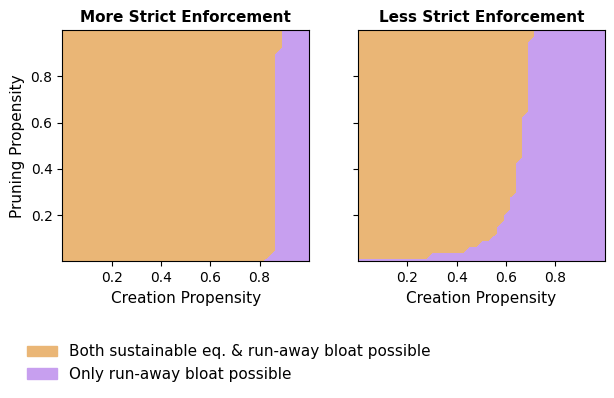

In [19]:
saveFig = False
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (7,3), sharey = True)
fontsize = 11
xlab = "Creation Propensity"
ylab = "Pruning Propensity"

sliceFuncs.plotPlanePanel(ax1, planeData1, plot_labels = [(True, xlab), (True, ylab)], fontsize = fontsize, title = "More Strict Enforcement")
sliceFuncs.plotPlanePanel(ax2, planeData2, plot_labels = [(True, xlab), (False, ylab)], fontsize = fontsize, title = "Less Strict Enforcement")
handles = [mpatches.Patch(color='#EAB676'), mpatches.Patch(color='#C79FEF')]
ax1.legend(handles = handles, labels = ['Both sustainable eq. & run-away bloat possible', 'Only run-away bloat possible'], 
           handlelength = 2, bbox_to_anchor=(-0.2, -0.3), loc = "upper left", frameon = False, fontsize = fontsize)

if saveFig:
    plt.savefig("SI_partial_enforcement.png", dpi = 400, bbox_inches = "tight")
else:
    plt.show()